In [4]:
import sys
import os
import Simulations_COVID19 as SCovid19
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd


'''
Load and collect data for the web,
fit the phenom models and save the info 
for the web.
'''

samples = 300
number_days = 200
n_steps = 25

list_countries = ['Spain']#,'Italy','US','France','United Kingdom','Germany','Netherlands']

folder_html = './tables/'
folder_images = './images/'

for folder in [folder_html,folder_images]:
    if not os.path.exists(folder):
        os.makedirs(folder)
        
Dates = {'Spain':{'3/8/20':['M8','-.'],'3/14/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

####### LOAD #######
path='../covid19_scenarios_data/case-counts/'
dataloader = SCovid19.data_loader()
dataloader.collect_data_neherlab(path, get_geo_loc = False)

"""
phenomsirs = SCovid19.phenom_simulator(countries = list_countries, data_table = dataloader.data)
for method in ['log-model', 'gompertz-model']:
    _ = phenomsirs.sample_posterior_predictive_model(method = method, field = 'deaths', samples = samples, number_days = number_days, n_steps=n_steps)
phenomsirs.save_table(path = path, file = 'phenom.json')
"""

ValueError: Expected object or value

In [ ]:
'''
Run beta-SIIERS exampe
'''

delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon  = 1/24, 1/24, 1/35, 0.48, 1.5, 1.0, 50.0, 0.0, 00.0

Dates = {'Spain':{'3/8/20':['M8','-.'],'3/13/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

field = 'Deaths'
method = 'gompertz-model'
country = 'Spain'
flag_res = 'False'
color = 'red'
beta_t0 = {'Spain': 51,'Italy': 47}
population = { 'Spain': 46.66  * 1000000 * 10000, 'Italy': 60.48 * 1000000}

location = 'Full Country'
dataloader.data['Country'] = dataloader.data['country'] + ', '+  dataloader.data['location']
for country in ['Spain','Italy']:
    bounds = [(0,2000),(1/30,1/7),(1/24,1/7), (1/34,1), (0.001,1), (0.001,60), (0.2, 1.0), (beta_t0[country],beta_t0[country])]
    simulator = SCovid19.siers_simulator(dataloader.data[dataloader.data['Country'] == country + ', '+  location], delta, gammaR, gammaD, mu, beta0, alpha, beta_t0[country], omega, epsilon, population[country], bounds)
    simulator.train()
    #simulator.plot_results(ylim = [0,55000])



In [24]:
simulator.mu


0.6190091883483929

[(0, 2000), (0.03333333333333333, 0.14285714285714285), (0.041666666666666664, 0.14285714285714285), (0.029411764705882353, 1), (0.001, 1), (0.001, 60), (0.001, 1.0), (0, 10000000)]
      fun: 4028.5254698515187
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([  944.75990409,  6016.19544796, 35640.57369658, 39181.7354739 ,
       -1758.8049559 ,   502.88481361,     0.        ,     0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1683
      nit: 106
   status: 0
  success: True
        x: array([6.93833238e-04, 1.00168575e-01, 4.16666667e-02, 2.94117647e-02,
       5.75448713e-01, 1.56171547e+00, 1.00000000e+00, 1.00000000e+07])

δ: Days for symptoms to appear: 9.983170869249099
1/γR: Days to recovery: 24.0
1/γD: Days to death: 34.0
μ: proportion of cases who die: 0.5754487130464689
E0: initial exposed: 0.0006938332375571229
β0: rate of infection: 1.5617154739402683
Days before Lockdown: 10000000.00000001
Lockdown strength: 1

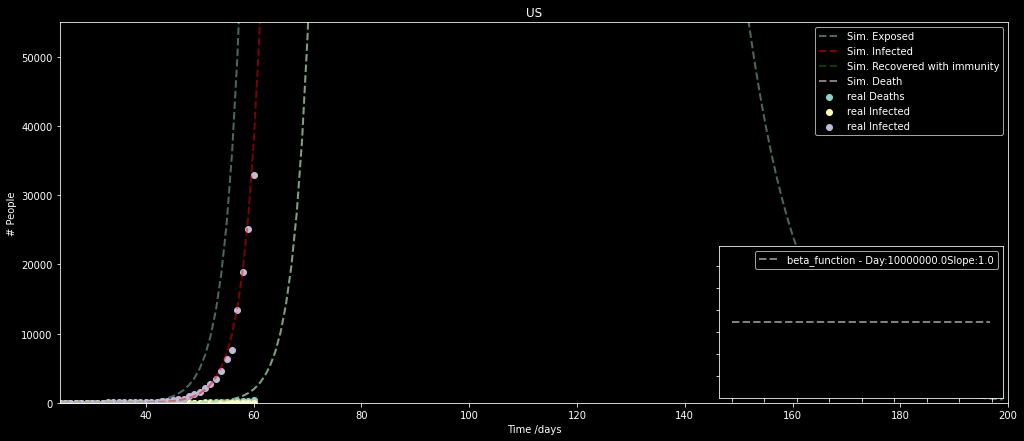

In [ ]:
'''
Run beta-SIIERS exampe
'''

delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population  = 1/24, 1/24, 1/35, 0.48, 1.5, 1.0, 5999999990.0, 0.0, 00.0, 88 * 1000000


country = 'US'

bounds = [(0,2000),(1/30,1/7),(1/24,1/7), (1/34,1), (0.001,1), (0.001,60), (0.001, 1.0), (0,10000000)]
simulator = SCovid19.siers_simulator(country, delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population, bounds)
simulator.load_data()
simulator.train()
simulator.plot_results(ylim = [0,55000])
simulator.plot_results(ylim = [0,10000])
simulator.plot_results(ylim = [0,3000])
simulator.plot_results(ylim = [0,1000])

In [12]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [16]:
import xlrd
import csv
import json

from urllib.request import urlretrieve
from collections import defaultdict
from datetime import datetime, timedelta
import os
import csv

from collections import defaultdict
from pygeocoder import Geocoder
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="COVID19")

In [45]:
from time import sleep




def add_growth(data, field):
    if np.sum(data.columns.str.contains(field)):
        if np.sum(data.columns.str.contains(field+'-GR')) == 0:
            
            Data0 = data.T[data.columns.str.contains(field)].T
            Data1 = Data0.shift(-1, axis = 0)
            Data2 = Data0.shift(-2, axis = 0) 

            epsilon =.01
            Growthr = (Data1-Data0)/(Data1 + epsilon)
            Growthr.columns = Growthr.columns.str.replace(field,field+'-GR')
            Growthr = Growthr.T.shift(1, axis = 1).T

            Growthf = (Data1-Data0)/(Data2 - Data1 + epsilon)
            Growthf.columns = Growthf.columns.str.replace(field,field+'-GF')
            Growthf = Growthf.T.shift(2, axis = 1).T

            data = pd.concat([data,Growthr,Growthf],axis=1)#.head(-1)
    return data

def collect_data_neherlab(path='../../covid19_scenarios_data/case-counts/', get_geo_loc = False):
    df = pd.DataFrame()
    if get_geo_loc:
        loc_dic = {} 
    else:
        loc_dic = pd.read_json(path+'locations.json')

    for r, d, f in os.walk(path):
        for file in f:
            if '.tsv' in file:
                country = os.path.basename(os.path.normpath(r))
                location = file[:-4]
                df_temp = pd.read_csv(r+'/'+file, header=3, delimiter = '\t', na_values='')    
                df_temp['longitude'] = None
                df_temp['latitude'] = None
                if location == "World":
                    df_World = pd.read_csv(r+'/'+file, header=3, delimiter = '\t', na_values='')  

                    for i in df_temp['location'].unique():
                        if get_geo_loc:
                            sleep(0.5)
                            try:
                                locat = geolocator.geocode(i, timeout=None)                
                                loc_dic[i] = [locat.longitude,locat.latitude]
                                df_temp.loc[df_temp['location'].values == i,'longitude'] = locat.longitude
                                df_temp.loc[df_temp['location'].values == i,'latitude'] = locat.latitude                              
                            except:
                                loc_dic[i] = [None,None]
                        for k in ['deaths','cases']:
                            df_temp = add_growth(df_temp, k)
                        
                    df_temp['longitude'] = [loc_dic[i][0] for i in df_temp.location]
                    df_temp['latitude'] = [loc_dic[i][1] for i in df_temp.location]
                    df_temp['country'] = df_temp['location']
                    df_temp['location'] = 'Full Country' 
                    df_temp = df_temp.copy()

                elif location == "cds":
                    df_cds = df_temp.copy()

                elif country != location:    
                    for k in ['deaths','cases']:
                        df_temp = add_growth(df_temp, k)
                    df_temp['country'] = country
                    df_temp['location'] = location 
                    if get_geo_loc:
                        sleep(0.5)
                        locat = geolocator.geocode(location, timeout=None)     
                        loc_dic[location] = [locat.longitude,locat.latitude]
                    df_temp['longitude'] = loc_dic[location][0]
                    df_temp['latitude'] = loc_dic[location][1]
                if sum(df_temp.columns == 'country'):
                    df = pd.concat([df,df_temp],sort=False)

    if get_geo_loc:
        pd.DataFrame(loc_dic).to_json(path+'locations.json')
    return df
    

df = collect_data_neherlab(get_geo_loc = False)

In [68]:
A = df[(df['location'] == 'Madrid')].groupby('time').sum().reset_index()

In [70]:
df[df['location'] == 'Full Country'].groupby(['time']).sum()

,cases,deaths,hospitalized,ICU,recovered,longitude,latitude
time,,,,,,,
2019-12-31,27.0,0.0,0.0,0.0,0.0,2293.773744,2187.584869
2020-01-01,27.0,0.0,0.0,0.0,0.0,2293.773744,2187.584869
2020-01-02,27.0,0.0,0.0,0.0,0.0,2293.773744,2187.584869
2020-01-03,44.0,0.0,0.0,0.0,0.0,2293.773744,2187.584869
2020-01-04,44.0,0.0,0.0,0.0,0.0,2293.773744,2187.584869
...,...,...,...,...,...,...,...
2020-03-22,304565.0,12934.0,0.0,0.0,0.0,2544.679951,3949.265459
2020-03-23,337593.0,14594.0,0.0,0.0,0.0,2486.650652,3995.836852
2020-03-24,377415.0,16358.0,0.0,0.0,0.0,2354.964590,4054.523744


In [78]:
df[(df['location'] == 'Full Country')&(df['country'] == country)]

,location,time,cases,deaths,hospitalized,ICU,recovered,longitude,latitude,deaths-GR,deaths-GF,cases-GR,cases-GF,country
1125,Full Country,2019-12-31,0.0,0.0,NaN,NaN,0.0,-107.991707,61.066692,-100,-0,-7200,-0,Canada
1126,Full Country,2020-01-01,0.0,0.0,NaN,NaN,0.0,-107.991707,61.066692,0,-100,0,-7200,Canada
1127,Full Country,2020-01-02,0.0,0.0,NaN,NaN,0.0,-107.991707,61.066692,0,0,0,0,Canada
1128,Full Country,2020-01-03,0.0,0.0,NaN,NaN,0.0,-107.991707,61.066692,0,0,0,0,Canada
1129,Full Country,2020-01-04,0.0,0.0,NaN,NaN,0.0,-107.991707,61.066692,0,0,0,0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Full Country,2020-03-22,1231.0,13.0,NaN,NaN,0.0,-107.991707,61.066692,0.076864,1.9802,0.211209,0.480751,Canada
1208,Full Country,2020-03-23,1430.0,18.0,NaN,NaN,0.0,-107.991707,61.066692,0.277624,0.199601,0.13916,1.30647,Canada
1209,Full Country,2020-03-24,1646.0,24.0,NaN,NaN,0.0,-107.991707,61.066692,0.249896,0.831947,0.131226,0.921254,Canada
1210,Full Country,2020-03-25,1959.0,27.0,NaN,NaN,0.0,-107.991707,61.066692,0.11107,1.99336,0.159775,0.690074,Canada


In [81]:
A = pd.read_json(path+'locations.json')

In [83]:
A['Afghanistan']

0    66.238514
1    33.768006
Name: Afghanistan, dtype: float64

In [86]:
dic2 = {}
dic2['df'] = 3
dic2['df3'] = 34

for key, val in dic2.items():
    print(key,val)

df 3
df3 34
